In [1]:
# Clark Mollencop
# analyze Insurance claims net witn 3-edge motifs

In [2]:
import pandas as pd
import seaborn as sns
import subprocess # to call the C++ executable that actually does the network analysis
import glob # to work with files later on
import bidirec_script # for input/formatting

In [3]:
ins_df = pd.read_csv('networks/network-all-w-dist.txt')
ins_df.rename(columns={'month(with Jan 2016 as 1)': 'month'}, inplace=True)
print(ins_df)
print(ins_df['dist'].describe())
print(ins_df['number'].describe())
print(ins_df['month'].max())

         zip_src  zip_dest  month  number        dist
0          22405     22401     10   10732    9.205179
1          22032     20151     10     111   17.479639
2          24501     24605     10     265  247.963582
3          20124     23060     10      42   31.371954
4          22153     22042     10    1667    5.202391
...          ...       ...    ...     ...         ...
3984945    24476     22801     57       9   40.202308
3984946    24523     22191     57       6  253.011456
3984947    24517     24354     57      12  256.099182
3984948    24216     24226     57       4   53.043826
3984949    24301     23707     57       2  497.189169

[3984950 rows x 5 columns]
count    3.984950e+06
mean     1.071738e+02
std      1.157832e+02
min      0.000000e+00
25%      2.796371e+01
50%      6.530877e+01
75%      1.406289e+02
max      8.876606e+02
Name: dist, dtype: float64
count    3.984950e+06
mean     1.617044e+02
std      1.037454e+03
min      1.000000e+00
25%      2.000000e+00
50%      8.

In [4]:
# SKIP THIS FOR NOW
# df = pd.read_csv('networks/network-all-w-dist.txt', sep=',', usecols=['zip_src', 'zip_dest', 'month(with Jan 2016 as 1)'])
# df.rename(columns = {'month(with Jan 2016 as 1)': 'timestamp'}, inplace=True)
# dfs_all_deltas = []
# # edge duplication logic not right in bidirec_script.dup_edges
# # this duplicates edges with timestamp <= delta to have timestamps
# # 60 + delta to capture effects at the end
# for i in range(1, 13):
#     df_dup = (df.loc[df['timestamp'] <= i])
#     df_dup_new = pd.concat([df, 
#                             pd.concat([df_dup.iloc[:,[0,1]],
#                                       df_dup.iloc[:,[2]]+60], axis=1)],
#                           ignore_index=True)
# for d in range(len(dfs_all_deltas)):
#     dfs_all_deltas[d].to_csv(path_or_buf= 'input/insurance_d_{num}.txt'.format(num=d+1), sep=' ', header=False, index=False)

In [5]:
# separate df into pre and post covid dfs
pre_df = ins_df[ins_df['month'] < 51 ]
post_df = ins_df[ins_df['month'] >= 51 ]

In [7]:
pre_covid_claims = pre_df['number'].sum()
post_covid_claims = post_df['number'].sum()
pre_covid_dist, post_covid_dist = 0, 0
for index, row in pre_df.iterrows():
    pre_covid_dist += row['number'] * row['dist']
for index, row in post_df.iterrows():
    post_covid_dist += row['number'] * row['dist']
print(f'avg pre: {pre_covid_dist/pre_covid_claims}')
print(f'avg post: {post_covid_dist/post_covid_claims}')

avg pre: 21.19004157803015
avg post: 23.16095318775191


array([[<AxesSubplot:title={'center':'dist'}>]], dtype=object)

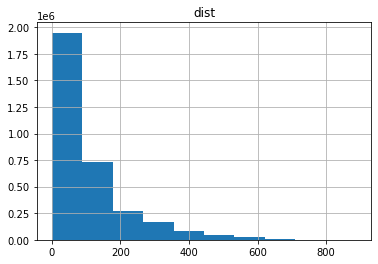

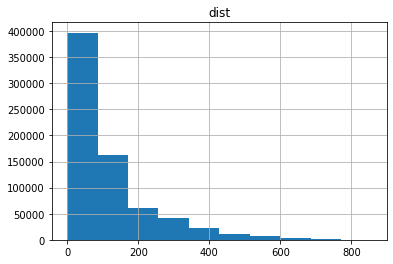

In [9]:
pre_df.hist(column='dist')
post_df.hist(column='dist')

In [ ]:
# maybe can ignore code below, doing it above more efficiently?

In [9]:
# analyzing average claim distance for pre covid (before March 2020)
# vs after covid (March 2020-end)
# month 1 is Jan 2016, so March 2020 is month 51
pre_covid_dist = 0
pre_covid_claims = 0
post_covid_dist = 0
post_covid_claims = 0
for index, row in ins_df.iterrows():
    # if pre covid
    if row['month'] < 51:
        # increment total pre covid distance 
        pre_covid_dist += row['number'] * row['dist']
        # increment number of total claims
        pre_covid_claims += row['number']
    elif row['month'] >= 51: # post covid
        post_covid_dist += row['number'] * row['dist']
        post_covid_claims += row['number']

avg_dist_pre = pre_covid_dist / pre_covid_claims
avg_dist_post = post_covid_dist / post_covid_claims


In [12]:
print(f'average pre covid distance {avg_dist_pre} = pre covid distance {pre_covid_dist} / pre covid claims {pre_covid_claims}')
print(f'average post covid distance {avg_dist_post} = post covid distance {post_covid_dist} / post covid claims {post_covid_claims}')

average pre covid distance 21.19004157803015 = pre covid distance 11134099536.438187 / pre covid claims 525440193.0
average post covid distance 23.16095318775191 = post covid distance 2754850231.9894624 / post covid claims 118943733.0


In [15]:
# do analysis for year pre covid (March 2019 - Dec 2019) vs post covid (March 2020 - Dec 2020)
# to eliminate possible time based variance?
pre_dist, pre_claims = 0, 0
post_dist, post_claims = 0, 0
for index, row in ins_df.iterrows():
    # march 2019 - dec 2019 (month 39 - month 48)
    if row['month'] > 38 and row['month'] < 49:
        pre_dist += row['number'] * row['dist']
        pre_claims += row['number']
    # march 2020 to end, which is dec 2020
    elif row['month'] >= 51:
        post_dist += row['number'] * row['dist']
        post_claims += row['number']
avg_dist_pre_yr = pre_dist / pre_claims
avg_dist_post_yr = post_dist / post_claims

In [16]:
print(f'average pre covid distance {avg_dist_pre_yr} = pre covid distance {pre_dist} / pre covid claims {pre_claims}')
print(f'average post covid distance {avg_dist_post_yr} = post covid distance {post_dist} / post covid claims {post_claims}')

average pre covid distance 21.69775641727144 = pre covid distance 2742667145.82903 / pre covid claims 126403260.0
average post covid distance 23.16095318775191 = post covid distance 2754850231.9894624 / post covid claims 118943733.0
